In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the training data
train_data = pd.read_csv('/content/train.csv')

# Extract features (pixels) and labels
X = train_data.drop('label', axis=1)
y = train_data['label']

In [ ]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)



In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

# Make predictions on the validation set
y_pred = model.predict(X_valid)



In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9091666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.95      0.97      0.96       909
           2       0.89      0.87      0.88       846
           3       0.90      0.87      0.89       937
           4       0.90      0.91      0.91       839
           5       0.85      0.86      0.86       702
           6       0.91      0.95      0.93       785
           7       0.93      0.92      0.92       893
           8       0.89      0.88      0.89       835
           9       0.89      0.91      0.90       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



In [ ]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Standardize features (scaling) for the test data
X_test = scaler.transform(test_data)

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Create a submission file (assuming a format required for a competition)
submission = pd.DataFrame({'ImageId': range(1, len(test_predictions) + 1), 'Label': test_predictions})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)


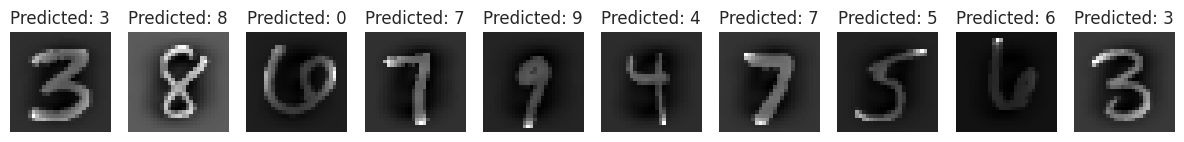

In [ ]:
num_samples_to_display = 10
random_indices = np.random.choice(X_valid.shape[0], num_samples_to_display, replace=False)

fig, axes = plt.subplots(1, num_samples_to_display, figsize=(12, 4))

for i, idx in enumerate(random_indices):
    ax = axes[i]
    ax.imshow(X_valid[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {y_pred[idx]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()